# SDS Challenge #3 - Job Postings

## Problem Statement

Welcome Data Scientist to the 3rd SDS Club Monthly Challenge! In this month's challenge you are helping your friend search for a job. Your friend has found thousands of job ads online and is trying to pick some to apply to. Your friends has heard that there are a lot of fraudulent job ads that are actually scams. Your mission is to help your friend by predicting whether a job is fraudulent based on the data provided.

## Evaluation

\begin{equation*}
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation*}
<br>

## Understanding the Dataset

Each column in the dataset is labeled and explained in more detail below.

**title** - title of the job in ad <br>
**location** - location of job ad <br>
**department** - corporate department <br>
**salary_range** - salary range of job <br>
**company_profile** - description of company <br>
**description** - description of position <br>
**requirements** - description of job requirements <br>
**benefits** - benefits offered by the employer <br>
**telecommuting** - if telecommuting position <br>
**has_company_logo** - if the company's logo is present in the ad <br>
**has_questions** - if interview questions are present in ad <br>
**employment_type** - type of employment (full-time, part-time, contract, etc.) <br>
**required_experience** - required experience for job (master's degree, bachelor, doctorate, etc.) <br>
**industry** - industry of company (Construction, Health Care, IT, etc.) <br>
**function** - function of company within industry (consulting, sales, research, etc.) <br>
**fraudulent** - whether job is fraudulent or not <br>

## Dataset Files

**public_jobs.csv** - Dataset to train and analyze <br>
**pred_jobs.csv** - Dataset to predict whether or not a job posting is fraudulent

## Submission

All submissions should be sent through email to challenges@superdatascience.com. When submitting, the file should contain predictions made on the pred_jobs.csv file, and it should have the following format:

In [ ]:
0
1
0
0
1
0

## Acknowledgements

The data was collected and published by The University of the Aegean, Laboratory of Information & Communication Systems Security.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/hnvivek/sds_challenges/master/challenge_3/data/public_jobs.csv")

In [3]:
df_train.shape

(14304, 17)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                14304 non-null  object
 1   location             14029 non-null  object
 2   department           5122 non-null   object
 3   salary_range         2325 non-null   object
 4   company_profile      11651 non-null  object
 5   description          14303 non-null  object
 6   requirements         12155 non-null  object
 7   benefits             8546 non-null   object
 8   telecommuting        14304 non-null  int64 
 9   has_company_logo     14304 non-null  int64 
 10  has_questions        14304 non-null  int64 
 11  employment_type      11542 non-null  object
 12  required_experience  8674 non-null   object
 13  required_education   7837 non-null   object
 14  industry             10404 non-null  object
 15  function             9144 non-null   object
 16  frau

In [5]:
df_train.isnull().sum()/len(df_train)*100

title                   0.000000
location                1.922539
department             64.191834
salary_range           83.745805
company_profile        18.547260
description             0.006991
requirements           15.023770
benefits               40.254474
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.309284
required_experience    39.359620
required_education     45.211130
industry               27.265101
function               36.073826
fraudulent              0.000000
dtype: float64

In [6]:
limitPer = len(df_train) * .50
df_train = df_train.dropna(thresh=limitPer,axis=1)

In [7]:
df_train.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Sales Professional - Buiding Products,"CA, BC, Langley",Great Customer Service from Start to FinishWha...,"Centra Windows an established, employee-owned ...",NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Building Materials,Sales,0
1,Senior Software Engineer,"GB, , London",We believe cities are complicated. And your mo...,"Londoners, New Yorkers, Parisians, and Berline...",We're looking for someone with several years' ...,NaN,0,1,1,Full-time,NaN,NaN,Computer Software,Engineering,0
2,Director of Operations (SCM & Manufacturing),"US, WA, Bellingham",POS-X is a rapidly growing point-of-sale hardw...,POS-X is a rapidly growing point-of-sale hardw...,Extensive Mathematical and/or Financial Backgr...,"$50 - $70k DOE and Performance + Medical, 401k...",0,1,1,Full-time,Director,Bachelor's Degree,Computer Hardware,Supply Chain,0
3,Data Center Migration App Lead for FULL-TIME O...,"US, PA, Harrisburg",NaN,Data Center Migration Application Lead / Archi...,NaN,NaN,0,0,0,Full-time,Director,Bachelor's Degree,Information Technology and Services,Information Technology,1
4,Data Entry Assistant - Intern,"HK, , Hong Kong","At Hayes-Corp, we create the fun stuff. With ...","Hayes Corp is looking for a patient, meticulou...",Degree in any discipline.Familiar with Microso...,"Opportunity to grow with the company, as data ...",0,1,0,Other,Entry level,Bachelor's Degree,Internet,Marketing,0


In [14]:
# Find the ratio of targetr class
df_train['fraudulent'].value_counts()

0    13595
1      709
Name: fraudulent, dtype: int64

In [10]:
# Down sampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train.fraudulent==0]
df_minority = df_train[df_train.fraudulent==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.fraudulent.value_counts()

1    709
0    709
Name: fraudulent, dtype: int64

In [11]:
df_downsampled.isnull().sum()/len(df_downsampled)*100

title                   0.000000
location                1.622003
company_profile        41.043724
description             0.070522
requirements           15.303244
benefits               40.479549
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        22.849083
required_experience    45.275035
required_education     50.211566
industry               29.266573
function               38.293371
fraudulent              0.000000
dtype: float64

In [12]:
df_downsampled.nunique()

title                  1080
location                638
company_profile         388
description            1185
requirements            961
benefits                637
telecommuting             2
has_company_logo          2
has_questions             2
employment_type           5
required_experience       7
required_education       13
industry                 86
function                 33
fraudulent                2
dtype: int64

In [16]:
df_downsampled=df_downsampled.drop(["company_profile","benefits"],axis=1)

In [22]:
df_downsampled.isnull().sum()

title                    0
location                23
description              1
requirements           217
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        324
required_experience    642
required_education     712
industry               415
function               543
fraudulent               0
dtype: int64

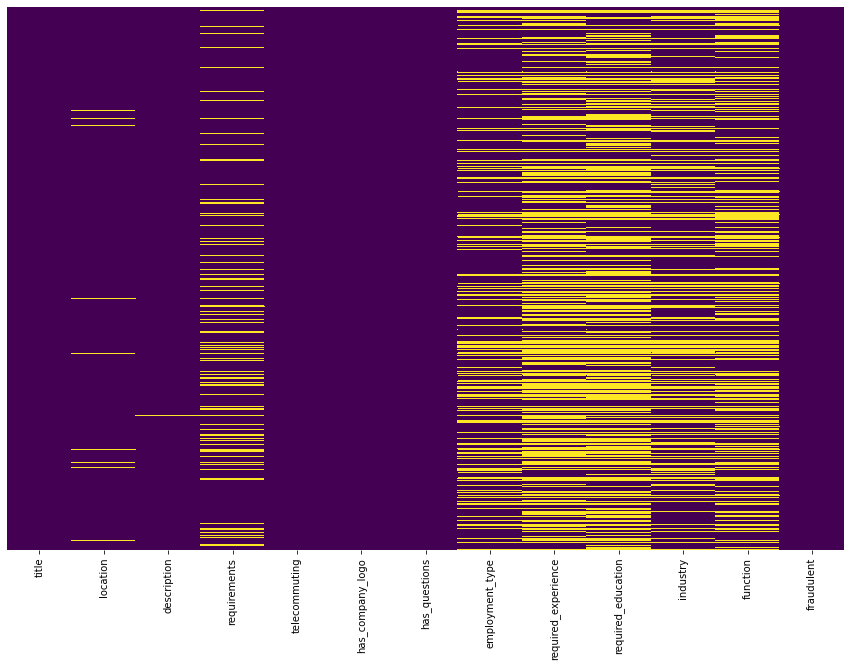

In [17]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_downsampled.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [18]:
df_downsampled.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,1418.000000,1418.000000,1418.000000,1418.000000
mean,0.059238,0.583216,0.389281,0.500000
std,0.236154,0.493200,0.487759,0.500176
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.500000
75%,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [19]:
objCol = df_downsampled.select_dtypes(include='object')
objCol

,title,location,description,requirements,employment_type,required_experience,required_education,industry,function
7187,English Teacher Abroad,"US, MA, Amherst","Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,Contract,NaN,Bachelor's Degree,Education Management,NaN
2948,Sales Manager,"US, MO, St. Louis",(We have more than 1500+ Job openings in our w...,NaN,Full-time,NaN,NaN,Marketing and Advertising,NaN
9213,Customer Relations - Full Time - No Call Center,"US, KY, Louisville",DescriptionLEI Home Enhancements is looking fo...,"JOB REQUIREMENTS:Ambition, strong work ethic a...",Full-time,NaN,NaN,NaN,Customer Service
6799,Messenger Courier,"US, DC, Washington",The Messenger Courier will be based in our Wa...,Minimum Requirements:Minimum of 6 months custo...,Full-time,Entry level,High School or equivalent,Government Administration,Customer Service
7848,Service Advisor,"US, MA, Wilmington",Bill Dube Hyundai in Wilmington MA just outsid...,This is a great opportunity to join a busy and...,Full-time,NaN,NaN,Automotive,Customer Service
...,...,...,...,...,...,...,...,...,...
14173,Receptionist - Administrative Assistant,"US, TX, Houston",Normal 0 Titan Business Properties (TBP)...,Normal 0 Job Duties:Produce information ...,Full-time,Entry level,High School or equivalent,Financial Services,Administrative
14186,Finance Assistant,"AU, NSW, Sydney",On behalf of our client we are looking for an ...,General requirements: · Male or Female · Age f...,Part-time,Not Applicable,NaN,Financial Services,Finance
14222,Administrative Workers Wanted,"GB, LND,",We are committed to the wellbeing of our plane...,NaN,NaN,NaN,NaN,NaN,NaN
14245,Payroll Data Coordinator Positions - Earn $100...,"US, TX, Abbott",We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,NaN,NaN,NaN,NaN,NaN


In [20]:
df_downsampled[objCol.columns]

,title,location,description,requirements,employment_type,required_experience,required_education,industry,function
7187,English Teacher Abroad,"US, MA, Amherst","Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,Contract,NaN,Bachelor's Degree,Education Management,NaN
2948,Sales Manager,"US, MO, St. Louis",(We have more than 1500+ Job openings in our w...,NaN,Full-time,NaN,NaN,Marketing and Advertising,NaN
9213,Customer Relations - Full Time - No Call Center,"US, KY, Louisville",DescriptionLEI Home Enhancements is looking fo...,"JOB REQUIREMENTS:Ambition, strong work ethic a...",Full-time,NaN,NaN,NaN,Customer Service
6799,Messenger Courier,"US, DC, Washington",The Messenger Courier will be based in our Wa...,Minimum Requirements:Minimum of 6 months custo...,Full-time,Entry level,High School or equivalent,Government Administration,Customer Service
7848,Service Advisor,"US, MA, Wilmington",Bill Dube Hyundai in Wilmington MA just outsid...,This is a great opportunity to join a busy and...,Full-time,NaN,NaN,Automotive,Customer Service
...,...,...,...,...,...,...,...,...,...
14173,Receptionist - Administrative Assistant,"US, TX, Houston",Normal 0 Titan Business Properties (TBP)...,Normal 0 Job Duties:Produce information ...,Full-time,Entry level,High School or equivalent,Financial Services,Administrative
14186,Finance Assistant,"AU, NSW, Sydney",On behalf of our client we are looking for an ...,General requirements: · Male or Female · Age f...,Part-time,Not Applicable,NaN,Financial Services,Finance
14222,Administrative Workers Wanted,"GB, LND,",We are committed to the wellbeing of our plane...,NaN,NaN,NaN,NaN,NaN,NaN
14245,Payroll Data Coordinator Positions - Earn $100...,"US, TX, Abbott",We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,NaN,NaN,NaN,NaN,NaN


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for item in objCol:
    df_downsampled[item] = le.fit_transform(df_downsampled[item].astype(str))

In [28]:
X = df_downsampled.loc[:,df_downsampled.columns!="fraudulent"]
y = df_downsampled["fraudulent"]
print(X.head())
print(y.head())

      title  location  description  ...  required_education  industry  function
7187    351       374          638  ...                   1        26        33
2948    842       432           16  ...                  13        56        33
9213    242       369          319  ...                  13        86         7
6799    610       293         1172  ...                   4        38         7
7848    907       381          200  ...                  13         4         7

[5 rows x 12 columns]
7187    0
2948    0
9213    0
6799    0
7848    0
Name: fraudulent, dtype: int64


In [29]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
y=y.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(1418, 12)
(1418, 1)


In [30]:
# Splitting the training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

def performanceMetrics(model,y_test,y_pred):
  print('Accuracy {} %'.format(100* accuracy_score(y_pred,y_test)))
  #Getting predicted probabilities
  if model!="NA":
    y_score = model.predict_proba(X_test)[:,1]
    print('\nRoc value '+ str(roc_auc_score(y_test, y_score)))
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm,annot =True,fmt='d')
  print('\nClassification Report \n\n'+ classification_report(y_test,y_pred))

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
model_lr= LogisticRegression()
model_lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = model_lr.predict(X_test)
y_pred


array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

Accuracy 73.59154929577466 %

Roc value 0.7980425278219396

Classification Report 

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       148
           1       0.72      0.74      0.73       136

    accuracy                           0.74       284
   macro avg       0.74      0.74      0.74       284
weighted avg       0.74      0.74      0.74       284



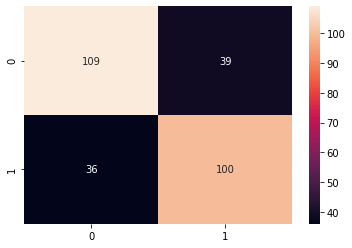

In [45]:
performanceMetrics(model_lr,y_test,y_pred)

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier()
model_rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

Accuracy 86.61971830985915 %

Roc value 0.9435860492845787

Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       148
           1       0.87      0.85      0.86       136

    accuracy                           0.87       284
   macro avg       0.87      0.87      0.87       284
weighted avg       0.87      0.87      0.87       284



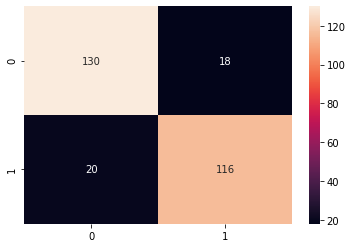

In [49]:
performanceMetrics(model_rf,y_test,y_pred_rf)

In [60]:
input=X_train.shape[1]

In [65]:
import tensorflow as tf
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape= (input,)))
model.add(tf.keras.layers.Dense(units=250,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               6500      
_________________________________________________________________
dense_9 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 132,001
Trainable params: 132,001
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [68]:
epochs_hist = model.fit(X_train,y_train,epochs=100,batch_size=25)

Epoch 1/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7169
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7628
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.7884
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8078
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8245
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8236
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8280
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8298
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8501
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8519
Epoch 11/

Text(0.5, 1.0, 'Loss and Accuracy plot')

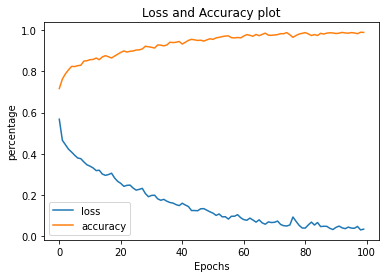

In [69]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.legend(['loss','accuracy'])
plt.title('Loss and Accuracy plot')

In [76]:
y_pred_ann =model.predict(X_test)

In [78]:
y_pred_ann = (y_pred_ann>0.5)

Accuracy 83.80281690140845 %

Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       148
           1       0.81      0.87      0.84       136

    accuracy                           0.84       284
   macro avg       0.84      0.84      0.84       284
weighted avg       0.84      0.84      0.84       284



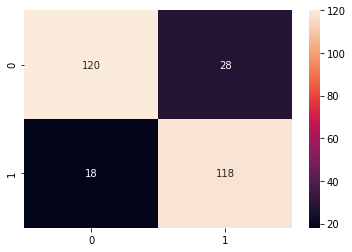

In [79]:
performanceMetrics("NA",y_test,y_pred_ann)